# 2.1.2库仑定律

设一个静止点电荷 $q$ 距检验电荷 $Q$ 的距离为 $\overrightarrow{\mathfrak r}$，那么它作用在 $Q$ 上的力是什么?
答案由(基于实验的)库仑定律给出：
$$
  \boldsymbol F = \frac{1}{4\pi\varepsilon_0} \frac{qQ}{\mathfrak r^2} \hat{\mathfrak r}
  \tag{2.1}
$$
常数 $\varepsilon_0$ 称为真空介电常数。
用 $\rm SI$ 单位制，力的单位为牛顿($\rm N$)，距离为米($\rm m$)，电荷为库仑($\rm C$), 则
$$
  \varepsilon_0 = 8.85 \times 10^{-12} \frac{\rm C^2}{\rm N \cdot m^2}
$$
可以看出，力正比于两电荷的乘积而反比于它们之间的距离。

我们总用 $\overrightarrow{\mathfrak r}$ 表示间隔矢量，
$$
  \overrightarrow{\mathfrak r} = \boldsymbol r - \boldsymbol r'
  \tag{2.2}
$$
式中，$\boldsymbol r'$ 是 $q$ 的位矢；$\boldsymbol r$ 是 $Q$ 的位矢；$\mathfrak r$ 是 $\overrightarrow{\mathfrak r}$ 的大小；$\hat{\mathfrak r}$ 是沿 $\overrightarrow{\mathfrak r}$ 方向的单位矢量。
力沿 $q$ 到 $Q$ 的连线方向；
如果 $q$ 同 $Q$ 同号，是排斥力，如果 $q$ 同 $Q$ 反号，是吸引力。

### 图像表示库仑定律

不妨设 $q = 1^{10}{\rm C}$ 大小的电荷放在原点处，考虑其他地方的电场强度：
$$
    \boldsymbol E = \frac{1}{4\pi\varepsilon_0} \frac{q}{\mathfrak r^2} \hat{\mathfrak r}
$$

矢量场：


(8991804694.45736*N.x/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.i + (8991804694.45736*N.y/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.j + (8991804694.45736*N.z/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.k

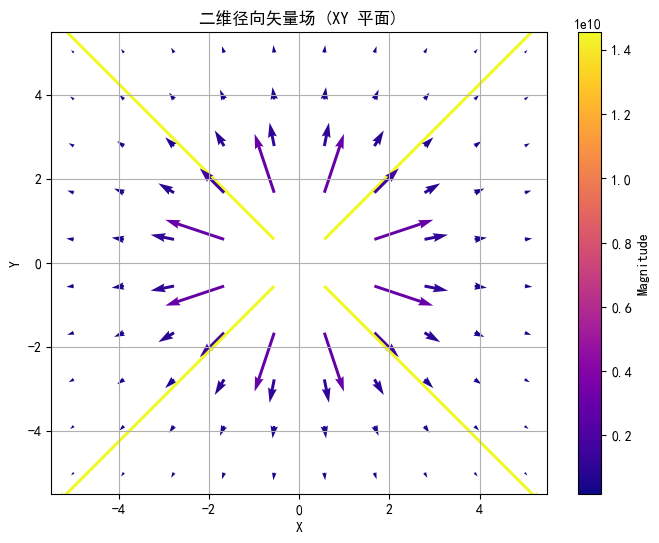

In [1]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    varepsilon_0 = 8.85e-12
    q = 1
    A = 1/(4*np.pi*varepsilon_0) * q * (N.x * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt(N.x**2 + N.y**2 + N.z**2)) ** 3)
    print('矢量场：')
    display(A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

矢量场 A：


(8991804694.45736*N.x/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.i + (8991804694.45736*N.y/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.j + (8991804694.45736*N.z/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.k

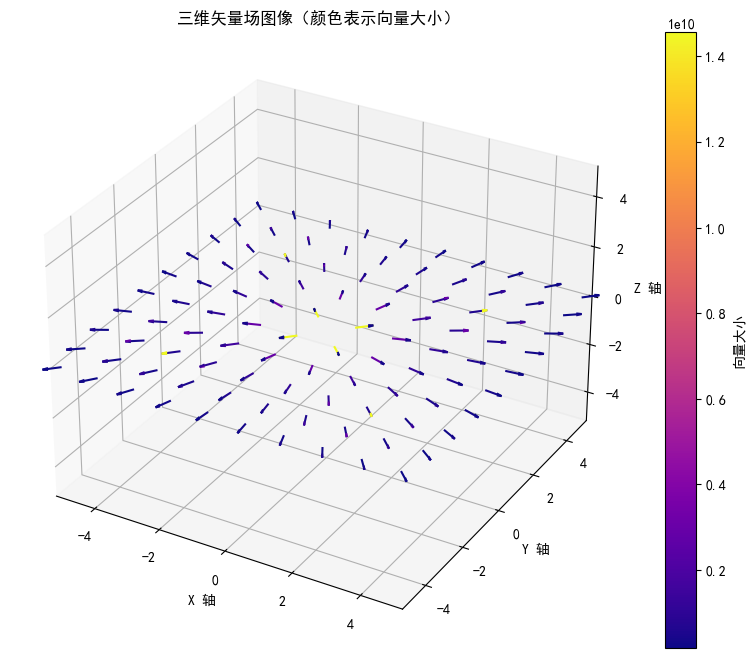

In [2]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):

    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    varepsilon_0 = 8.85e-12
    q = 1
    A = 1/(4*np.pi*varepsilon_0) * q * (N.x * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt(N.x**2 + N.y**2 + N.z**2)) ** 3)
    # 输出矢量场
    print('矢量场 A：')
    display(A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.show()

## 习题2.1

1) $12$ 个带相同电荷量 $q$ 的电荷分别位于一个正 $12$ 边形的顶角处(比如，在一个钟表的每一个读数处)。
一个检验电荷 $Q$ 位于这个正 $12$ 边形的中心，它受到的合力是多大?

由正十二边形的对称性，它受到的力沿着对角线相互抵消，于是合力等于 $0$。

2) 假定一个电荷被移走(处在6点钟位置的那个)，则作用在 $Q$ 上的力是什么?
仔细解释你的理由。

如果正十二边形的半径是 $a$，则每个点电荷距离中心的位置是 $\frac{a}{2\sin \frac{\pi}{12}}$。
处于六点钟位置的电荷本身，对 $Q$ 的作用力是
$$
  \boldsymbol F = \frac{\sin^2\frac{pi}{12}}{\pi\varepsilon_0} \frac{qQ}{a^2} \hat{\mathfrak r}
$$
因为这个力和另外十一个点电荷的合力平衡，所以作用在 $Q$ 上的力是大小相等，方向相反的力。

3) 现在，设 $13$ 个带相同电荷量 $q$ 的电荷分别位于一个正13边形的顶角处，那么，位于这个正 $13$ 边形中心的 $Q$ 受的力是什么?

不妨设这十三个点的位置是
$$
  a e^{i \frac{2\pi}{13}}, a e^{i \frac{4\pi}{13}}, \cdots, a e^{2i\pi}
$$
实际上这些点对中心的力沿着位置的反方向。
求它们的合力，就是求
$$
  (-F) \cdot \left( 1 + e^{2\pi i}{13} + \cdots + e^{24\pi i }{13} \right)  = 0
$$

4) 假定 $13$ 个电荷中的一个电荷被移走，则作用在 $Q$ 上的力是什么?
解释你的理由。

该力与被移除的那个点电荷的静电力平衡，因此有
$$
  \boldsymbol F = \frac{\sin^2\frac{pi}{13}}{\pi\varepsilon_0} \frac{qQ}{a^2} \hat{\mathfrak r}
$$

#### 使用 python 查看这一点

In [5]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 创建一个三维坐标系
N = CoordSys3D('N')
# 定义矢量场
varepsilon_0 = 8.85e-12 #真空介电常数
q = 1 #电荷量

# 电荷分布：正十二边形
theta = np.linspace(0, 2 * np.pi, 13)
rho = 3
x_hexagon = rho * np.cos(theta)
y_hexagon = rho * np.sin(theta)
# 计算矢量场
A = 0 * N.i + 0 * N.j + 0 * N.k
for i in range(12):
    A += 1/(4*np.pi*varepsilon_0) * q * ( (N.x - x_hexagon[i]) * N.i + (N.y - y_hexagon[i]) * N.j) / ( (sp.sqrt((N.x - x_hexagon[i])**2 + (N.y - y_hexagon[i])**2)) ** 3)
print('矢量场：')
display(A)
A.subs({N.x: 0, N.y: 0, N.z: 0})

矢量场：


(0.037037037037037*(8991804694.45736*N.x - 26975414083.3721)/(0.111111111111111*N.y**2 + (0.333333333333333*N.x - 1)**2)**(3/2) + 0.0570222488088519*(8991804694.45736*N.x - 23361393873.8047)/((0.384900179459751*N.x - 1)**2 + 0.333333333333333*(0.666666666666667*N.y - 1)**2)**(3/2) + 0.057022248808852*(8991804694.45736*N.x - 23361393873.8047)/((0.384900179459751*N.x - 1)**2 + 0.333333333333334*(0.666666666666666*N.y + 1)**2)**(3/2) + 0.0570222488088519*(8991804694.45736*N.x - 13487707041.686)/(0.333333333333334*(0.666666666666667*N.x - 1)**2 + (0.384900179459751*N.y - 1)**2)**(3/2) + 0.0570222488088519*(8991804694.45736*N.x - 13487707041.686)/(0.333333333333332*(0.666666666666668*N.x - 1)**2 + (0.38490017945975*N.y + 1)**2)**(3/2) + 0.037037037037037*(8991804694.45736*N.x - 1.6517677256438e-6)/(0.111111111111111*(N.x - 1.83697019872103e-16)**2 + (0.333333333333333*N.y - 1)**2)**(3/2) + 0.037037037037037*(8991804694.45736*N.x + 4.95530317693141e-6)/(0.111111111111111*(N.x + 5.51091059616

(3.57627868652344e-7)*N.i + (-2.38418579101563e-7)*N.j